# Dijkstra Algorithm
Algorithm for searching the brewed graphs for the fastest/cheapest route to go from the start point to the finish point. (Algorithms p. 115) <br>
Below I present an example of a simple weighted graph, its visualizations and implementations of the dijkstra algorithm.
### ATTENTION
The algorithm **does not work** on graphs that contain cycles or negative weights

In [16]:
graph = {'start': {'a': 6, 'b': 2}, 'a': {'meta': 1}, 'b': {'a': 3, 'meta': 5}, 'meta': {}}
print(graph)

{'start': {'a': 6, 'b': 2}, 'a': {'meta': 1}, 'b': {'a': 3, 'meta': 5}, 'meta': {}}


start is connected with a, weight 6
start is connected with b, weight 2
a is connected with meta, weight 1
b is connected with a, weight 3
b is connected with meta, weight 5


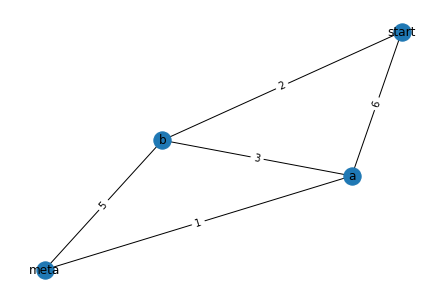

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def visualiseGraph(graph):
    G = nx.Graph()
    for vertex, edges in graph.items():
        G.add_node("%s" % vertex)
        for edge, weight in edges.items():
            G.add_node("%s" % edge)
            G.add_edge("%s" % vertex, "%s" % edge, weight = weight)
            print("%s is connected with %s, weight %s" % (vertex,edge, weight))

    # Create positions of all nodes and save them
    pos = nx.spring_layout(G)

    # Draw the graph according to node positions
    nx.draw(G, pos, with_labels=True)

    # Create edge labels
    labels = nx.get_edge_attributes(G,'weight')

    # Draw edge labels according to node positions
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()

visualiseGraph(graph)

In [18]:
infinity = float("inf")
costs = {"a": 6, "b": 2, "meta": infinity}
print(costs)

{'a': 6, 'b': 2, 'meta': inf}


In [19]:
import pandas as pd
def visualiseCosts():
    Visualise = pd.DataFrame.from_dict(costs, orient='index', columns=['cost'])
    return Visualise

visualiseCosts()

,cost
a,6.0
b,2.0
meta,inf


In [20]:
parents = {"a": "start", "b": "start", "meta": None}
print(parents)

{'a': 'start', 'b': 'start', 'meta': None}


In [21]:
def visualiseParents():
    Visualise = pd.DataFrame.from_dict(parents, orient='index', columns=['parent'])
    return Visualise

visualiseParents()

,parent
a,start
b,start
meta,None


## Implementation

In [22]:
def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    for activeNode in costs:
        activeCost = costs[activeNode]
        if activeCost < lowest_cost and activeNode not in processed:
            lowest_cost = activeCost
            lowest_cost_node = activeNode
    return lowest_cost_node



processed = []
node = find_lowest_cost_node(costs)
while node is not None:
    cost = costs[node]
    neighbors = graph[node]
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        if costs[n] > new_cost:
            costs[n] = new_cost
            parents[n] = node
    processed.append(node)
    node = find_lowest_cost_node(costs)
print(f"Ready! Lowest cost {costs['meta']}")
visualiseCosts()

Ready! Lowest cost 6


,cost
a,5
b,2
meta,6


## Example exercise from OI
- Zawody [tutaj](https://szkopul.edu.pl/problemset/problem/UiDG8sd_wsS2RfUPL3zQQ1XW/site/?key=statement)
- Podróż
- Przemytnicy
- Sumy
- Zaby(trudniejsze)
- Korale(trudniejsze)
